In [1]:
#import the necessary modules 
import numpy as np 
import math
import matplotlib.pylab as plt 
import pandas as pd 
import scipy
import sklearn
import itertools as it
from itertools import cycle 
import os.path as op
import timeit 
import json
#from matplotlib import animation
#import matplotlib.font_manager as font_manager
%matplotlib inline
# These imports are for creating the percent occupancy heat map 
#import plotly
#import plotly.plotly as py
#import plotly.graph_objs as go

#### Import MDAnalysis

In [2]:
# Import MDAnalysis
import MDAnalysis as mda
import statsmodels as stats
from MDAnalysis.analysis import distances

In [3]:
#Units of Angstroms 
dmax = 4.0

In [4]:
#exp_bsa_atoms = np.any(dij_tri <= dmax, axis=1)

# Boolean arrays must be of the same shape as the initial dimensions of the array being indexed.
# In the most straightforward case, the boolean array has the same shape
# Unlike in the case of integer index arrays, in the boolean case,
# the result is a 1-D array containing all the elements in the indexed array corresponding
#       to all the true elements in the boolean array.

#bres_wit_dmax = prot[exp_bsa_atoms].residues

In [5]:
from prot_polymer_analysis import (get_protresd_list,aa_frmcount, AA_list_org,frac_cont)
from secOrd_surf_prot import solv_vec_protsurf

### Iduronate-2-sulfatase VMD SASA calculation (1st order surface AA characterization)

In [6]:
# Sasa calc using VMD 
sasa_id2s = pd.read_csv("ID2S_new.txt", sep=" ", header=None, names=['res_label','res_no','sasa_label','sasa_ID2S'])
sasa_id2s

,res_label,res_no,sasa_label,sasa_ID2S
0,residue:,100,sasa:,0.214292
1,residue:,101,sasa:,71.901329
2,residue:,102,sasa:,0.868588
3,residue:,103,sasa:,5.861117
4,residue:,104,sasa:,18.886673
...,...,...,...,...
502,residue:,95,sasa:,0.289529
503,residue:,96,sasa:,48.685890
504,residue:,97,sasa:,1.302881
505,residue:,98,sasa:,59.119953


In [7]:
sasa_id2s.index

RangeIndex(start=0, stop=507, step=1)

In [8]:
org_ind = sasa_id2s.index
ss_tot = sasa_id2s.sort_values('res_no')
ss_tot.index = org_ind
ss_tot.head()

,res_label,res_no,sasa_label,sasa_ID2S
0,residue:,34,sasa:,183.174088
1,residue:,35,sasa:,152.724426
2,residue:,36,sasa:,48.462769
3,residue:,37,sasa:,39.876366
4,residue:,38,sasa:,11.981773


In [9]:
ss_tot['res_no'][100]

134

In [10]:
# Load universe of the BSA/water simulation
id2s_only = mda.Universe("ID2S.pdb")

# Load protein atoms, heavy atoms only 
id2s_prot = id2s_only.select_atoms("protein")

pr_res = list(id2s_prot.residues)
ss_res = [str(row) for row in pr_res]
id2s_resdat = pd.Series(data=ss_res)
id2s_resdat.head()

0    <Residue THR, 34>
1    <Residue ASP, 35>
2    <Residue ALA, 36>
3    <Residue LEU, 37>
4    <Residue ASN, 38>
dtype: object

In [11]:
ss_tot['res_no'] = id2s_resdat
ss_tot.drop('res_label', axis=1, inplace=True)
ss_tot.head()

,res_no,sasa_label,sasa_ID2S
0,"<Residue THR, 34>",sasa:,183.174088
1,"<Residue ASP, 35>",sasa:,152.724426
2,"<Residue ALA, 36>",sasa:,48.462769
3,"<Residue LEU, 37>",sasa:,39.876366
4,"<Residue ASN, 38>",sasa:,11.981773


In [12]:
a_a = ["GLY","ALA","VAL","LEU","ILE","MET","PHE","TRP","PRO","SER","THR","CYS","TYR","ASN","GLN","ASP"
               ,"GLU","LYS","ARG","HIS"]

In [13]:
ss_tot["res_no"][18]

'<Residue GLY, 52>'

In [14]:
#From VMD, SASA calculation on each residue, surface exposed is area greater than 1 angstrom squared
from re import search
ssid2s_list = []
indx_list = []

for i in range(len(a_a)):
    count = 0
    for j in range(len(ss_tot['res_no'])):
        sas = ss_tot["sasa_ID2S"][j]
        sid = str(ss_tot["res_no"][j])
        #print(sas)
        #print(sid)
        if (sid.find(a_a[i]) > 0) == True:
            if sas > 1.0:
                #print(sas)
                #print(sid)
                #print(j)
                indx_list.append(j)
                count += 1
            #else :
            #    print(sasa_id2s["sasa_ID2S"][j])
                #print('nope')
    ssid2s_list.append(str(str(a_a[i])+"  "+str(count)))
#ssid2s_list

In [ ]:
#indx_list

In [ ]:
#list(id2s_prot.residues[indx_list].atoms)

In [ ]:
#hydrophobic_res = ['ALA', 'ILE', 'LEU', 'VAL', 'GLY', 'PRO','PHE', 'TRP','MET']
#polar_res = ['ASN', 'CYS', 'GLN', 'SER', 'THR','TYR']
#neg_res = ['ASP', 'GLU']
#pos_res = ['ARG', 'HIS', 'LYS']
# aromatic_res = ['PHE', 'TRP', 'TYR', 'HIS']
#all_res = [pos_res, neg_res, polar_res, hydrophobic_res]

# Put the AA count in a pandas dataframe 
dg , ji = AA_list_org(ssid2s_list)
aa_count = pd.DataFrame(data=dg, index=None, columns=['Amino_acids'])
new_lf = pd.Series(data=ji, index=None)
#vmg, vmdj = AA_list_org(vmd_list)
#n2lf = pd.Series(data=vmdj, index=None)
aa_count['No_of_surf_res (SASA) ID2S'] = new_lf
#aa_count['No_of_surf_res (VMD)_BSA'] = n2lf
aa_count

In [ ]:
totaa = aa_count['No_of_surf_res (SASA) ID2S'].sum()
totaa

In [ ]:
# Number of positively charged residues (MD analysis)
aa_count['No_of_surf_res (SASA) ID2S'][0:3].sum()/totaa

In [ ]:
# Number of negatively charged residues (MD Analysis)
aa_count['No_of_surf_res (SASA) ID2S'][3:5].sum()/totaa

In [ ]:
# Number of polar residues (MD Analysis)
aa_count['No_of_surf_res (SASA) ID2S'][5:11].sum()/totaa

In [ ]:
# Number of hydrophobic residues (MD Analysis)
aa_count['No_of_surf_res (SASA) ID2S'][11:20].sum()/totaa

In [ ]:
# aromatic_res = ['PHE', 'TRP', 'TYR', 'HIS']
hf_bs = aa_count['No_of_surf_res (SASA) ID2S'][8].sum() 
hf_b = aa_count['No_of_surf_res (SASA) ID2S'][17:19].sum() 
hf_2vb = aa_count['No_of_surf_res (SASA) ID2S'][2].sum()
(hf_bs +hf_b +hf_2vb)/totaa

### Plotting 

In [ ]:
import matplotlib.patches as mpatches

#circ1= mpatches.Patch(facecolor='None',edgecolor='black', hatch=r'\\',label='VMD')
#circ2= mpatches.Patch(facecolor='None',edgecolor='black', hatch=r'////',label='VMD_sasa')
#circ3= mpatches.Patch(facecolor='None', edgecolor='black',label='SASA')
circ4= mpatches.Patch(facecolor='blue',label='Positively Charged')
circ5= mpatches.Patch(facecolor='red',label='Negatively Charged')
circ6= mpatches.Patch(facecolor='magenta',label='Polar')
circ7= mpatches.Patch(facecolor='cyan',label='Hydrophobic')

#plotting 
#Change order of residues before making the bar graph
# (!) Positively charged
# (2) Negatively charged
# (3) Polar residues 
# (4) Hydrophobic residues 
x = np.arange(20)
#width = 0.25
#leg_1 = ['MD Analysis', 'VMD Calculation']
leg = ['Positively Charged', 'Negatively Charged', 'Polar', 'Hydrophobic']
plt.figure(figsize=(10,10))
plt.bar(x[0:3], aa_count['No_of_surf_res (SASA) ID2S'][0:3], color='blue', edgecolor='black')

plt.bar(x[3:5], aa_count['No_of_surf_res (SASA) ID2S'][3:5], color='red', edgecolor='black')

plt.bar(x[5:11], aa_count['No_of_surf_res (SASA) ID2S'][5:11], color='magenta', edgecolor='black')

plt.bar(x[11:20], aa_count['No_of_surf_res (SASA) ID2S'][11:20], color='cyan', edgecolor='black')

plt.xticks(x,aa_count['Amino_acids'], fontsize=12)
plt.title('Iduronate-2-sufatase Surface AAs', fontsize=17)
legend1 = plt.legend(handles = [circ4, circ5, circ6, circ7], loc=0,fontsize=15, frameon=False)
#plt.legend(handles = [circ1, circ2, circ3],loc=9,fontsize=12, frameon=False)
plt.gca().add_artist(legend1)

# need to check residue indexing in my code

## Second order ID2S surface AA characterization 

In [ ]:
#pr_res

In [15]:
# Select protein surface atoms 
surfatmsID2S = id2s_prot.residues[indx_list].atoms

In [ ]:
len(list(surfatmsID2S.residues))

In [ ]:
list(id2s_prot.select_atoms('resname ARG and resid 294'))

In [ ]:
indx_list[0]

In [ ]:
calpha = surfatmsID2S.residues[312].atoms

In [ ]:
njk = mda.lib.NeighborSearch.AtomNeighborSearch(id2s_prot)
len(list(njk.search(atoms=calpha.select_atoms("name CA"), radius=, level='A')))

In [ ]:
list(surfatmsID2S.residues[312].atoms)

In [ ]:
len(surfatmsID2S.residues)

#### Get solvent vector for each surface residue

In [16]:
slvec_dict, nn_surf = solv_vec_protsurf(surfatmsID2S, id2s_prot, 10, 0, 4, 0.01)

In [17]:
len(nn_surf)

401

In [18]:
nn_surf[0]

10

In [19]:
c1 = 0
c2 = 0 
c3 = 0

for i in range(len(nn_surf)):
    if nn_surf[i] == 10:
        c1 += 1
    elif nn_surf[i] == 11:
        c2 += 1 
    elif nn_surf[i] == 12:
        c3 += 1
        
print(c1)
print(c2)
print(c3)

355
44
2


([<matplotlib.axis.XTick at 0x13b1ff128>,
 [Text(0, 0, '10'), Text(1, 0, '11'), Text(2, 0, '12')])

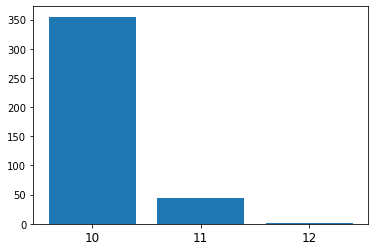

In [20]:
xr = np.arange(3)
cn_nn = np.array([c1,c2,c3])
plt.bar(xr, cn_nn)
plt.xticks(xr,['10','11','12'], fontsize=12)

#### Get surface patches

In [21]:
def psurf_patches(prot_surf_atoms, solv_vects_res, nnb, angle_cut, r_1, r_2, rd_s):
    
    # Initialize dictionary that will store residues and angles for each surface residue
    sfp_tot = {}
    
    # Initialize numpy array of even spaced radius values in Angstroms
    rs = np.arange(r_1, r_2, rd_s)
    
    # Get number of surface residues
    no_srfres = len(list(prot_surf_atoms.residues))
    
    nn_ps = mda.lib.NeighborSearch.AtomNeighborSearch(prot_surf_atoms)
    
    resnnbh = []
    
    for i in range(no_srfres):
        
        #nn_ps = mda.lib.NeighborSearch.AtomNeighborSearch(prot_surf_atoms)
        
        rindx = 0
        
        rs_atms = prot_surf_atoms.residues[i].atoms
        
        #print(i)
        #print(rs_atms)
        
        for j in range(len(rs)):
            
            sfreslis = list(nn_ps.search(atoms=rs_atms, radius=rs[j], level='R'))
            #print(len(sfreslis))
            
            # I need to add elif 11 neighbors because based on the cutoff, some surf res will have 
            # 9,11, or 12 neighbors but not 10 neighbors, Can't think of a better fix   
            
            # If nn = 10 (using XOR bitwise operator)
            #if nnb ^ len(sfreslis) == 0:
            if nnb <= len(sfreslis) <= nnb+2:
                rindx = j
                resnnbh.append(len(sfreslis))
                break
            # if nn = 11    
            #elif nnb ^ len(sfreslis) == 1:
            #    rindx = j
            #    resnnbh.append(len(sfreslis))
            #    break
            # if nn = 12
            #elif nnb ^ len(sfreslis) == 6:
            #    rindx = j
            #    resnnbh.append(len(sfreslis))
            #    break
            
        # Error check: Making sure that a radial value was stored that corresponds to desired nearest neighbors
        if rindx == 0:    
            print(rindx)
            print(len(sfreslis))
            print(rs_atms)
            print(i)
            
        ls_sfrs = nn_ps.search(atoms=rs_atms, radius=rs[rindx], level='R')
        
        # Initialize dictionary that will store angles and residues 
        sf_patres = {}
        
        sf_notinc = {}
        
        for k in range(len(ls_sfrs)):
            
            if str(prot_surf_atoms.residues[i]) == str(ls_sfrs[k]):
            
                pass
            
            elif str(prot_surf_atoms.residues[i]) != str(ls_sfrs[k]):
                
                vt_one = solv_vects_res[str(ls_sfrs[k])]
                
                vt_two = solv_vects_res[str(prot_surf_atoms.residues[i])].reshape(3,1)
                
                angl_rs = math.degrees(math.acos(np.dot(vt_one,vt_two)))
                
                if angl_rs <= angle_cut:
                    
                    sf_patres[str(ls_sfrs[k])] = angl_rs
                    
                elif angl_rs >= angle_cut:
                    
                    sf_notinc[str(ls_sfrs[k])] = angl_rs
                    
                    #print(str(ls_sfrs[k]))
                    #print(angl_rs)
                    
        sfp_tot[str(prot_surf_atoms.residues[i])] = [sf_patres, sf_notinc]
    
    return sfp_tot, resnnbh
    

In [22]:
sfr_id2s, neig_1d2s = psurf_patches(surfatmsID2S, slvec_dict, 10, 110, 1, 10, 0.01)

In [23]:
len(neig_1d2s)

401

In [24]:
# number of nearset neighbors used for surface patch calc for each residue
c1_r = 0
c2_r = 0 
c3_r = 0

for i in range(len(neig_1d2s)):
    if neig_1d2s[i] == 10:
        c1_r += 1
    elif neig_1d2s[i] == 11:
        c2_r += 1 
    elif neig_1d2s[i] == 12:
        c3_r += 1
        
print(c1_r)
print(c2_r)
print(c3_r)

398
3
0


([<matplotlib.axis.XTick at 0x13b1a6128>,
 [Text(0, 0, '10'), Text(1, 0, '11'), Text(2, 0, '12')])

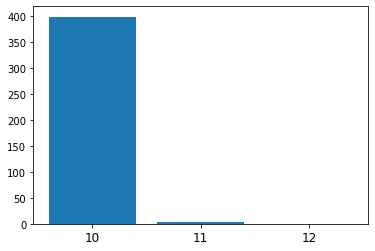

In [25]:
xr = np.arange(3)
cn_nnrr = np.array([c1_r,c2_r,c3_r])
plt.bar(xr, cn_nnrr)
plt.xticks(xr,['10','11','12'], fontsize=12)

In [ ]:
import json

with open('SP_ID2S.json', 'w') as fp:
    json.dump(sfr_id2s, fp, sort_keys=True, indent=4)

In [ ]:
with open('SP_ID2S.json', 'r') as fp:
    sfr_id2s_t1 = json.load(fp)

In [ ]:
sfp_tot['<Residue THR, 34>']['<Residue ASP, 35>']

### Testing

In [ ]:
# right orientation of solvent vector(use angle of CA and N GLY 52, it should be 38 degrees)
solvec = sglyCA.positions - nn10_glyCa.center_of_mass()
#solvec = nn10_glyCa.center_of_mass() - sglyCA.positions
solvec

In [ ]:
nn10_glyCa[0].position

In [ ]:
#import math
#fst_NN = nn10_glyCa.center_of_mass() - nn10_glyCa[2].position
fst_NN = nn10_glyCa[2].position - nn10_glyCa.center_of_mass()
fst_NN

In [ ]:
#import math 
slvnorm = solvec/np.linalg.norm(solvec)
ffnorm = fst_NN/np.linalg.norm(fst_NN)
#math.degrees(math.acos(np.dot(solvec,fst_NN)))
math.degrees(math.acos(np.dot(slvnorm,ffnorm)))

In [ ]:
np.dot(solvec,fst_NN)

In [ ]:
angl_gly52 = []
for i in range(10):
    print(i)
    fst_NN = nn10_glyCa[i].position - nn10_glyCa.center_of_mass()
    ffnorm = fst_NN/np.linalg.norm(fst_NN)
    angl_gly52.append(math.degrees(math.acos(np.dot(slvnorm,ffnorm))))
    #print(i)
angl_gly52